<a href="https://colab.research.google.com/github/Jovania/Projetos-01/blob/master/Resnet18_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtendo o dataset

In [10]:
!wget https://www.dropbox.com/s/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip?dl=0
!unzip -qq -n cassava-leaf-disease-classification.zip?dl=0

--2020-12-21 18:25:22--  https://www.dropbox.com/s/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip [following]
--2020-12-21 18:25:22--  https://www.dropbox.com/s/raw/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca86aeafadbb3f53b86b0639aa6.dl.dropboxusercontent.com/cd/0/inline/BFgXHxJ6mMNNN998daAhJR0KkbNCNSc3140imrFRlov4NLP9VX1GXGY11CPfNWhMmDEGbBnQdSCTiAx9eQSy6k7CslfMSvaseed_hJ-8oX2AdTcWw7r9W8_UEMFaZVl492o/file# [following]
--2020-12-21 18:25:22--  https://uca86aeafadbb3f53b86b0639aa6.dl.dropboxusercontent.com/cd/0/inline/BFgXHxJ6mMNNN998daAhJR0Kk

In [11]:
import pandas as pd

df_train = pd.read_csv("train.csv")
df_train.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [12]:
df_train["disease"] = df_train.label.map({0:"Cassava Bacterial Blight (CBB)",
1:"Cassava Brown Streak Disease (CBSD)",
2:"Cassava Green Mottle (CGM)",
3:"Cassava Mosaic Disease (CMD)",
4:"Healthy"})

df_train.head()

,image_id,label,disease
0,1000015157.jpg,0,Cassava Bacterial Blight (CBB)
1,1000201771.jpg,3,Cassava Mosaic Disease (CMD)
2,100042118.jpg,1,Cassava Brown Streak Disease (CBSD)
3,1000723321.jpg,1,Cassava Brown Streak Disease (CBSD)
4,1000812911.jpg,3,Cassava Mosaic Disease (CMD)


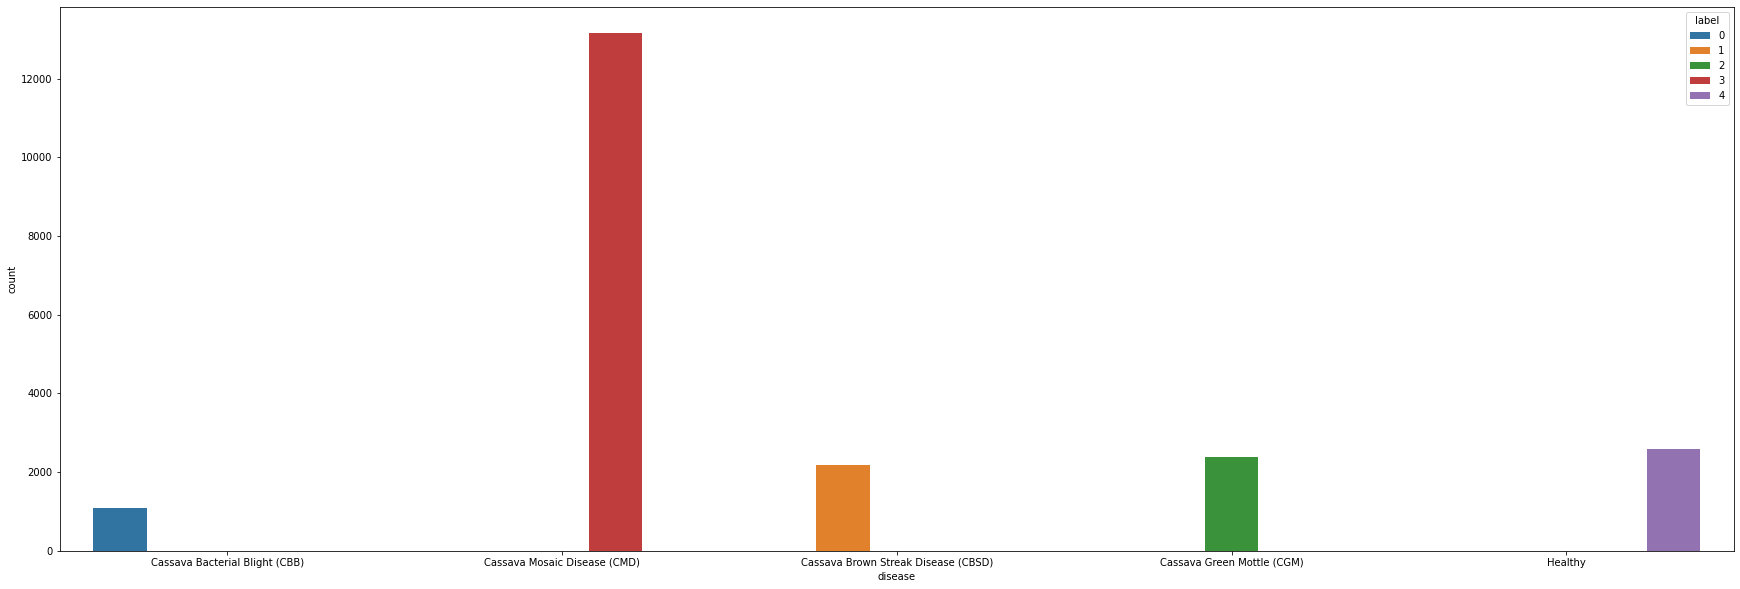

In [13]:
import os
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import rcParams


rcParams["figure.figsize"] = 30,10
sns.countplot(data = df_train,x="disease",hue="label")

# Instalando fastai

In [14]:
! [ -e /content ] && pip install -Uqq fastai

In [15]:
from fastai.vision.all import *

# Carregando o dataset e redimensionando

In [16]:
dls = ImageDataLoaders.from_df(df_train, path="./train_images/", item_tfms=Resize(224))

In [17]:
#dls.show_batch()

# Treinando um modelo

In [18]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy], pretrained=False)
learn.fit(20)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.231822,1.084011,0.387707,0.612293,03:49
1,1.019422,1.070396,0.405469,0.594531,03:47
2,0.911689,1.171897,0.426268,0.573732,03:48
3,0.834518,1.189949,0.385838,0.614162,03:48
4,0.781632,1.193404,0.455948,0.544052,03:51
5,0.752664,1.265322,0.361066,0.638934,03:48
6,0.720313,0.878535,0.339799,0.660201,03:43
7,0.703000,1.150614,0.421594,0.578406,03:40
8,0.674238,0.936174,0.307548,0.692452,03:40
9,0.645030,1.601995,0.634728,0.365272,03:43


In [19]:
from google.colab import drive

# Autorização
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/pesos/')

%ls

Mounted at /content/drive


In [20]:
os.chdir('/content/drive/My Drive/pesos/')

In [ ]:
learn.export()